In [11]:
"""
References: https://keras.io/examples/mnist_cnn/
https://victorzhou.com/blog/keras-neural-network-tutorial/
https://www.geeksforgeeks.org/activation-functions-neural-networks/
https://www.tensorflow.org/tutorials/keras/classification
https://towardsdatascience.com/writing-your-first-neural-net-in-less-than-30-lines-of-code-with-keras-18e160a35502
"""

import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting
from keras.datasets import mnist #Handwritten Digit Classification Dataset
from keras.models import Sequential
from keras.layers import Dense, Softmax
from keras.utils import to_categorical #data encoding
import warnings

warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)

#60000 represents the number of images in the training dataset
#28, 28 represents the size of the image (pixel)

(60000, 28, 28)
(60000,)


In [3]:
#Sequential model is a linear stack of layers; we are basically initializing a sequential model
model = Sequential() 

#Adding network layers(dense layers in this case)
#A dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the
#neurons in the previous layer, thus densely connected.
#We'll flatten each 28x28 into a 784 dimensional vector, which is going to be the input to our neural network
#Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further
#adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a 
#neuron.
model.add(Dense(784, activation='relu', input_shape=(28*28,)))
model.add(Dense(784, activation='relu', input_shape=(28*28,)))

#Classification problem with 10 possible categories (0 to 9); the final layer has a potential output of 10 units
model.add(Dense(10, activation='softmax'))

#Compiling the model
#Adam Optimizer (Adagrad) is an optimizer with parameter-specific learning rates, which are adapted relative 
#to how frequently a parameter gets updated during training (gradient descent)
#categorical_crossentropy is a logarithmic loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
#It is most common to use 32-bit precision when training a neural network, so at one point the training data will
#have to be converted to 32 bit floats. Since the dataset fits easily in RAM, we might as well convert to float 
#immediately. Regarding the division by 255, this is the maximum value of a byte (the input feature's type before 
#the conversion to float32), so this will ensure that the input features are scaled between 0.0 and 1.0. 
x_train = x_train.reshape((60000, 28*28)) #Reshapes a tensor to the specified shape
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

print(x_train.shape) #60000 images, 784 pixels
print(x_test.shape) #10000 testing images, 784 pixels

(60000, 784)
(10000, 784)


In [5]:
#Encoding data (it turns a number of features in numerical representations)
#to_categorical: Converts a class vector (integers) to binary class matrix.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape) 
print(y_test.shape)

(60000, 10)
(10000, 10)


In [6]:
#Training the model
#fit: Trains the model for a fixed number of epochs (iterations on a dataset)
#batch_size: Number of samples per gradient update
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 34s 571us/step - loss: 0.2003 - accuracy: 0.9400
Epoch 2/5
60000/60000 [==============================] - 31s 523us/step - loss: 0.0739 - accuracy: 0.9766
Epoch 3/5
60000/60000 [==============================] - 32s 531us/step - loss: 0.0462 - accuracy: 0.9851
Epoch 4/5
60000/60000 [==============================] - 32s 541us/step - loss: 0.0364 - accuracy: 0.9884
Epoch 5/5
60000/60000 [==============================] - 32s 540us/step - loss: 0.0269 - accuracy: 0.9910


In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy: {:.2f}'.format(test_accuracy))
print('Test loss: {:.2f}'.format(test_loss))

10000/10000 [==============================] - 4s 381us/step
Test accuracy: 0.98
Test loss: 0.07


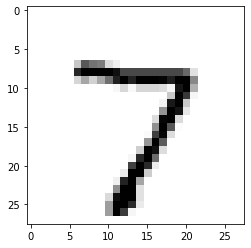

Predicted number: 7
Actual number:  7


In [20]:
image_index = 0 #we're going to deal with the first image
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.show()

prediction = model.predict(x_test) 
print('Predicted number: {}'.format(np.argmax(prediction[0]))) #prints the predicted number

#Checking answer
index = 0
actual_number = 0
for element in y_test[0]:
    if element == 1:
        actual_number = index
    index += 1        
print('Actual number: ', actual_number) #array from 0 to 9; 0: that's not our number; 1: that's our number